In [20]:
import os
import numpy as np
import tensorflow as tf
import tensorflow.python.keras as keras
import matplotlib.pyplot as plt
import vis

In [21]:
print("keras {}".format(keras.__version__))
print("keras {}".format(tf.__version__))

keras 2.6.0
keras 2.13.0


In [23]:
from keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
for ilayer, layer in enumerate(model.layers):
     print("{:3.0f} {:10}".format(ilayer, layer.name))

  0 input_4   
  1 block1_conv1
  2 block1_conv2
  3 block1_pool
  4 block2_conv1
  5 block2_conv2
  6 block2_pool
  7 block3_conv1
  8 block3_conv2
  9 block3_conv3
 10 block3_pool
 11 block4_conv1
 12 block4_conv2
 13 block4_conv3
 14 block4_pool
 15 block5_conv1
 16 block5_conv2
 17 block5_conv3
 18 block5_pool
 19 flatten   
 20 fc1       
 21 fc2       
 22 predictions


In [25]:
import json

CLASS_INDEX = json.load(open("imagenet_classes.json"))
classlabel = []
for i_dict in range(len(CLASS_INDEX)):
    classlabel.append(CLASS_INDEX[str(i_dict)][1])
print("No of class {}".format(len(classlabel)))

No of class 1000


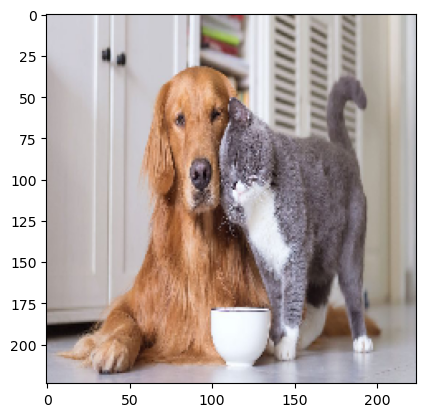

In [26]:
from keras.preprocessing.image import load_img, img_to_array
_img = load_img("dog_vs_cat.jpg",target_size=(224,224))
plt.imshow(_img)
plt.show()

In [27]:
img = img_to_array(_img)
img = preprocess_input(img)
y_pred = model.predict(img[np.newaxis,...])
class_idxs_sorted = np.argsort(y_pred.flatten())[::-1]
topNclass         = 5
for i, idx in enumerate(class_idxs_sorted[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,y_pred[0,idx]))

1/1 [==============================] - 0s 461ms/step
Top 1 predicted class:     Pr(Class=redbone            [index=168])=0.172
Top 2 predicted class:     Pr(Class=Afghan_hound       [index=160])=0.104
Top 3 predicted class:     Pr(Class=Saluki             [index=176])=0.104
Top 4 predicted class:     Pr(Class=golden_retriever   [index=207])=0.076
Top 5 predicted class:     Pr(Class=Irish_setter       [index=213])=0.073


In [28]:
from vis.utils import utils

layer_idx = utils.find_layer_idx(model, 'predictions')
model.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model)


c:\Users\indtal\AppData\Local\anaconda3\envs\deepLearning\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
from vis.visualization import visualize_cam

penultimate_layer_idx = utils.find_layer_idx(model, 'block5_conv3')
class_idx = class_idxs_sorted[0]
seed_input = img
grad_top1 = visualize_cam(model, layer_idx, class_idx, seed_input,
                          penultimate_layer_idx= penultimate_layer_idx,
                          backprop_modifier=None,
                          grad_modifier=None)


ImportError: cannot import name 'advanced_activations' from 'keras.layers' (c:\Users\indtal\AppData\Local\anaconda3\envs\deepLearning\Lib\site-packages\keras\layers\__init__.py)